# 연관관계분석

 상품별로 어떤 연관성이 묶여서 구매되는 경향이 있는지 파악
 market basket analytics

 군집분석 : 각 사람마다 개체마다의 연관성을 묶어서 (행, 개체들을 유사하게 묶음) ->거리개념

 연관관계 분석 : 열단위로 분석 -> 상품들간의 관계를 분석(열, 변수, 상품간의 연관성을 묶음) -> 조건부확률의 개념


# 연결 규칙의 예

100명의 고객이 있다고 가정합니다. 그 중 10명은 우유를, 8명은 버터를, 6명은 둘 다 구매했습니다.

우유 구매 => 버터 구매

지지도 = P(우유 & 버터) = 6/100 = 0.06   # 해당 규칙은 전체 대비 6%의 확률로 일어남

신뢰도 = 지지도/P(버터) = 0.06/0.08 = 0.75 # 선행변수를 구매하면 후행변수를 구매할 확률은 75%임

향상도 = 신뢰도/P(우유) = 0.75/0.10 = 7.5 # 규칙이 없을때와 비교해 7.5배로 규칙이 일어남

참고: 이 예는 매우 작습니다. 실제로 규칙은 통계적으로 중요한 것으로 간주되기 전에 수백 개의 트랜잭션을 지원해야 하며 데이터 세트에는 종종 수천 또는 수백만 개의 트랜잭션이 포함됩니다.

# 지지도(support) : 교사건/

빈발 아이템 세트에 기초하여 후보규칙들의 집합결정/

apriori가 대표적 알고리즘/

많이 팔리는 물건을 체크/


# 신뢰도(confidence) : 조건부확률 /

조건을 줬을때 상품이 팔리는 확률 -> 규칙


# 향상도(lift) :  조건이 없을때와 조건을 줬을때의 상대적인 비율





# apriori 

연관 규칙을 찾아주는 알고리즘 중 가장 먼저 개발

연관성 규칙의 첫번째 단계는 아이템들 간의 연관성을 나타내기 위한 후보가 되는 모든 규칙들을 생성

단일 아이템 세트 -> 2개로 된 아이템 세트 -> 3개로 된 아이템 세트 ...

이 중 높은 빈돌르 갖는 조합(빈발 아이템 세트:frequent item sets)를 찾아내는 것

# 지지도(support) = 교사건 = 교집합
확률의 교사건

전체 거래 중 조건부(a)와 결론부(b)를 모두 포함하는 거래의 비율

발생할 가능성이 높아야함

# 신뢰도 

조건부 확률

연관 규칙의 강도 (urle strength)

조건부 아이템 (a)를 구매한 경우, 이 중에서 얼마나 결론부 아이템(b)를 구매할 것인지를 의미




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder #원핫인코딩을 해줌 
from mlxtend.frequent_patterns import apriori #빈발아이템 규칙
from mlxtend.frequent_patterns import association_rules #규칙생성



In [ ]:
# 데이터 가져오기
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/project/Superstore_Sales_Dataset.csv')
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [ ]:
# #컬럼명 변경
df.rename(columns={
    'Row ID':'row_id',
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'Segment':'segment',
    'Country':'country',
    'City':'city',
    'State':'state',
    'Postal Code':'postal_code',
    'Region':'region',
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'sub-category',
    'Product Name':'product_name',
    'Sales':'sales'
},inplace=True)

In [ ]:
# 데이터 타입 확인
df.info() , df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9800 non-null   int64  
 1   order_id       9800 non-null   object 
 2   order_date     9800 non-null   object 
 3   ship_date      9800 non-null   object 
 4   ship_mode      9800 non-null   object 
 5   customer_id    9800 non-null   object 
 6   customer_name  9800 non-null   object 
 7   segment        9800 non-null   object 
 8   country        9800 non-null   object 
 9   city           9800 non-null   object 
 10  state          9800 non-null   object 
 11  postal_code    9789 non-null   float64
 12  region         9800 non-null   object 
 13  product_id     9800 non-null   object 
 14  category       9800 non-null   object 
 15  sub-category   9800 non-null   object 
 16  product_name   9800 non-null   object 
 17  sales          9800 non-null   float64
dtypes: float

(None, Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
        'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
        'postal_code', 'region', 'product_id', 'category', 'sub-category',
        'product_name', 'sales'],
       dtype='object'))

In [ ]:
# 데이터 확인
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
# null 확인
df.isna().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
dtype: int64

In [ ]:
df['postal_code'] =  df['postal_code'].fillna(5401) #
# null 확인
df.isna().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
dtype: int64

In [ ]:
# Order Date로 시간순 정렬
df = df.sort_values(by='order_date')

In [ ]:
data = df[['order_id','order_date','product_name']]
data.iloc[2]

order_id                       CA-2018-151750
order_date                         01/01/2018
product_name    SAFCO Boltless Steel Shelving
Name: 8069, dtype: object

In [ ]:
data[(data['order_id']=='CA-2017-152156')&(data['order_date']=='08/11/2017')]

,order_id,order_date,product_name
0,CA-2017-152156,08/11/2017,Bush Somerset Collection Bookcase
1,CA-2017-152156,08/11/2017,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."


In [ ]:
# 시간순으로 정렬한 상품명의 개수
data.groupby('order_date')['product_name'].count().sort_index()
# data.groupby('Order Date')['Product Name'].count().sort_values(ascending=False)

time_y = data.groupby('order_date')['product_name'].count().sort_index()
time_x = time_y.index

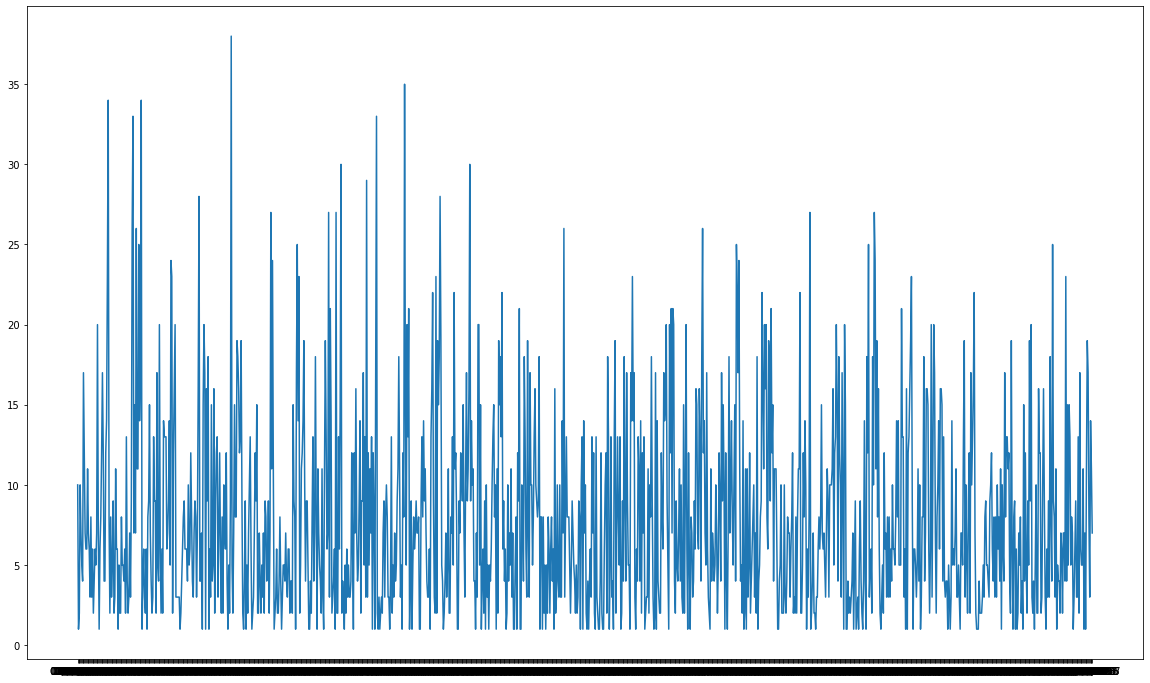

In [ ]:
#시계열 순으로 데이터의 흐름 시각화
plt.figure(figsize=(20,12))
plt.plot(time_x,time_y)
plt.show()

In [ ]:
# 인덱스를 날짜데이터로 변환
d = data.copy()
d.set_index('order_date',inplace=True)
d.index = pd.to_datetime(d.index)

In [ ]:
print(d.iloc[0:5])

                  order_id                                       product_name
order_date                                                                   
2018-01-01  CA-2018-144463  Howard Miller 11-1/2" Diameter Brentwood Wall ...
2018-01-01  CA-2018-154466            Wilson Jones Easy Flow II Sheet Lifters
2018-01-01  CA-2018-151750                      SAFCO Boltless Steel Shelving
2018-01-01  CA-2018-151750  Tenex Carpeted, Granite-Look or Clear Contempo...
2018-01-01  CA-2018-151750       Office Star - Contemporary Task Swivel Chair


In [ ]:
# 전체 팔린 개별 아이템의 수, 전체 날짜, 전체 월, 일별 평균 팔린 아이템의 개수, 중복없는 아이템의 개수


total_items = len(d)
total_days = len(np.unique(d.index.date))
total_months = len(np.unique(d.index.month))
average_items = total_items/total_days
unique_items = len(np.unique(d.product_name))

print('상품 구색 수 : {}'.format(unique_items))
print('{}달에 걸쳐, {}일동안 총 {}개의 아이템을 판매함.'.format(total_months,total_days,total_items))
print('일 평균 {}개의 아이템을 판매'.format(average_items))

상품 구색 수 : 1849
12달에 걸쳐, 1230일동안 총 9800개의 아이템을 판매함.
일 평균 7.967479674796748개의 아이템을 판매


In [ ]:
#유니크값을 출력하는 세가지 방법

len(np.unique(d.product_name)) , d['product_name'].unique().size , d.product_name.unique().size

# 셋다 동일한 문법임

(1849, 1849, 1849)

In [ ]:
print(d.resample("M")['product_name'].count()) #인덱스를 기준으로 월별로 리샘플링

dm = d.resample("M")['product_name'].count()

order_date
2015-01-31    126
2015-02-28     84
2015-03-31    161
2015-04-30    121
2015-05-31    146
2015-06-30    135
2015-07-31    154
2015-08-31    145
2015-09-30    238
2015-10-31    145
2015-11-30    258
2015-12-31    240
2016-01-31     86
2016-02-29    102
2016-03-31    144
2016-04-30    159
2016-05-31    174
2016-06-30    149
2016-07-31    128
2016-08-31    170
2016-09-30    271
2016-10-31    153
2016-11-30    279
2016-12-31    240
2017-01-31    154
2017-02-28    122
2017-03-31    190
2017-04-30    186
2017-05-31    257
2017-06-30    180
2017-07-31    201
2017-08-31    236
2017-09-30    225
2017-10-31    231
2017-11-30    288
2017-12-31    264
2018-01-31    209
2018-02-28    228
2018-03-31    302
2018-04-30    225
2018-05-31    241
2018-06-30    220
2018-07-31    241
2018-08-31    248
2018-09-30    382
2018-10-31    272
2018-11-30    369
2018-12-31    321
Freq: M, Name: product_name, dtype: int64


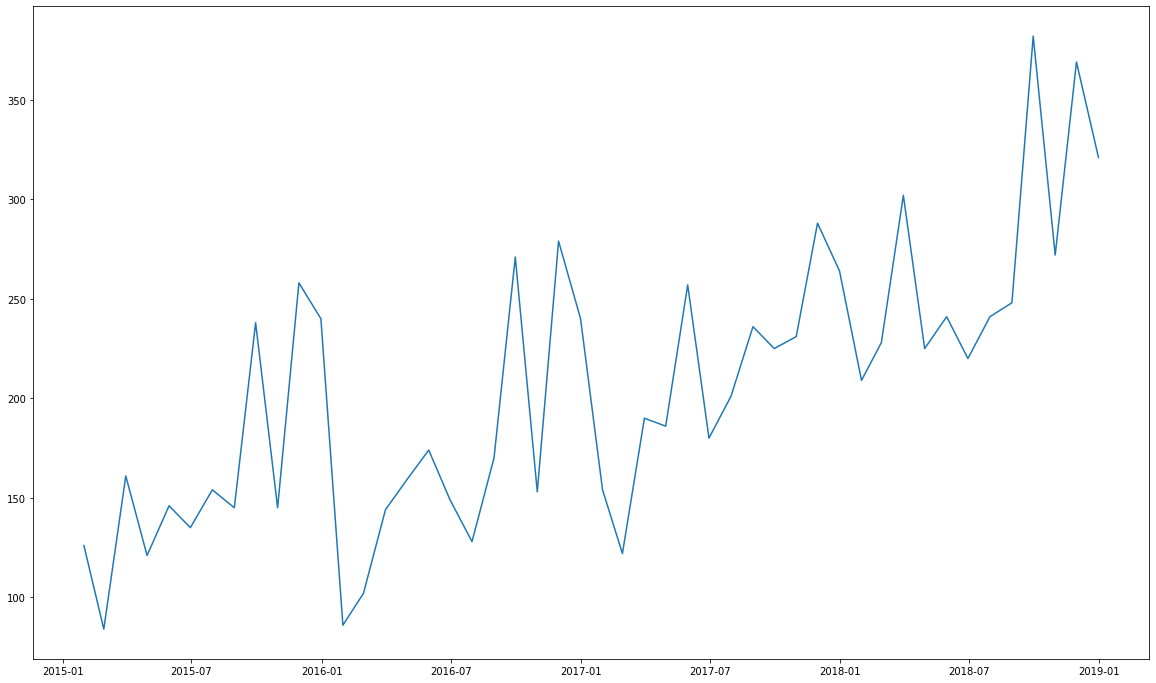

In [ ]:
x1 = dm.index
y1 = dm.values

plt.figure(figsize=(20,12))
plt.plot(x1,y1)
plt.show()

In [ ]:
# 제품의 유니크 값을 카운트해줌
d['product_name'].value_counts()

Staple envelope                                                              47
Staples                                                                      46
Easy-staple paper                                                            44
Avery Non-Stick Binders                                                      20
Staple remover                                                               18
                                                                             ..
Xerox 1932                                                                    1
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order     1
Bush Birmingham Collection Bookcase, Dark Cherry                              1
Eureka Hand Vacuum, Bagless                                                   1
Panasonic Business Telephones KX-T7736                                        1
Name: product_name, Length: 1849, dtype: int64

In [ ]:


x2 = d['product_name'].value_counts().keys()
y2 = d['product_name'].value_counts().values


print(x2)
print(y2)


Index(['Staple envelope', 'Staples', 'Easy-staple paper',
       'Avery Non-Stick Binders', 'Staple remover', 'Staples in misc. colors',
       'Storex Dura Pro Binders', 'KI Adjustable-Height Table',
       'Staple-based wall hangings',
       'Logitech 910-002974 M325 Wireless Mouse for Web Scrolling',
       ...
       'Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner',
       'Cubify CubeX 3D Printer Triple Head Print',
       'Xerox WorkCentre 6505DN Laser Multifunction Printer',
       'Hewlett-Packard Deskjet D4360 Printer',
       'Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier',
       'Xerox 1932',
       'Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order',
       'Bush Birmingham Collection Bookcase, Dark Cherry',
       'Eureka Hand Vacuum, Bagless',
       'Panasonic Business Telephones KX-T7736'],
      dtype='object', length=1849)
[47 46 44 ...  1  1  1]


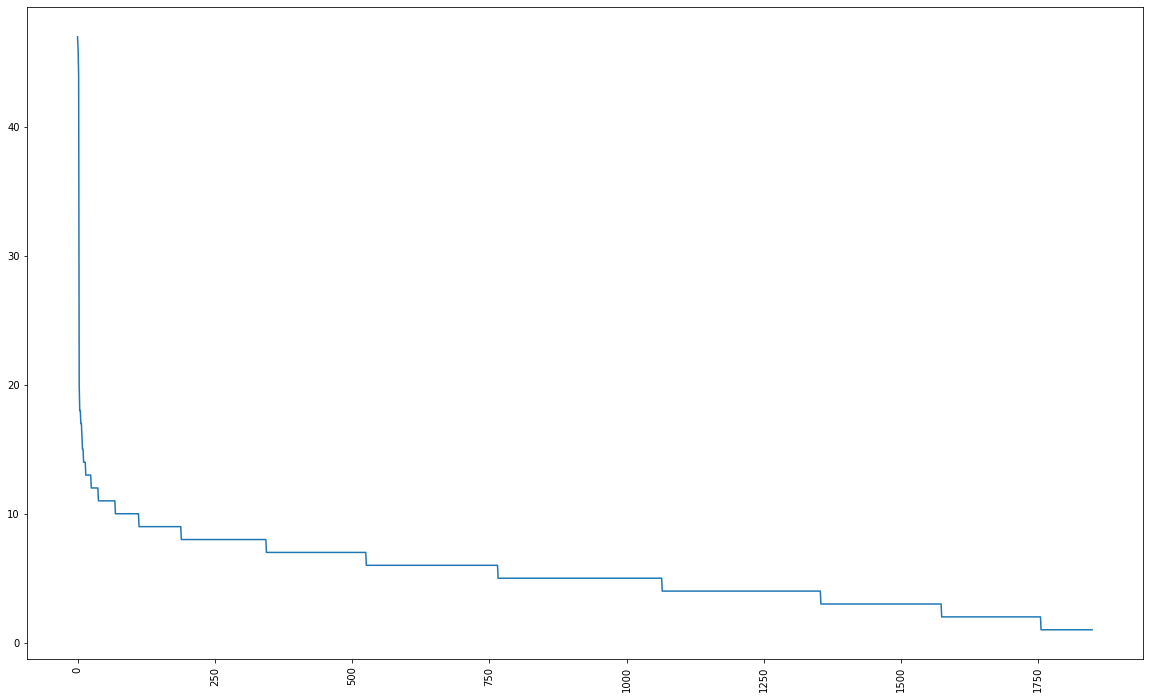

In [ ]:
# 개별 제품의 상위 20개의 판매량 시각화

plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
plt.plot(y2)
plt.show()

In [ ]:
transactions = [a[1]['product_name'].tolist() for a in list(data.groupby(['order_id','order_date']))]

In [ ]:
list(data.groupby(['order_id','order_date']))

[(('CA-2015-100006', '07/09/2015'),
              order_id  order_date       product_name
  2717  CA-2015-100006  07/09/2015  AT&T EL51110 DECT),
 (('CA-2015-100090', '08/07/2015'),             order_id  order_date  \
  6287  CA-2015-100090  08/07/2015   
  6288  CA-2015-100090  08/07/2015   
  
                                             product_name  
  6287            Hon 2111 Invitation Series Corner Table  
  6288  Wilson Jones Ledger-Size, Piano-Hinge Binder, ...  ),
 (('CA-2015-100293', '14/03/2015'),
              order_id  order_date product_name
  9514  CA-2015-100293  14/03/2015   Xerox 1887),
 (('CA-2015-100328', '28/01/2015'),             order_id  order_date  \
  3083  CA-2015-100328  28/01/2015   
  
                                             product_name  
  3083  Pressboard Covers with Storage Hooks, 9 1/2" x...  ),
 (('CA-2015-100363', '08/04/2015'),
              order_id  order_date                    product_name
  3836  CA-2015-100363  08/04/2015  Things To Do 

In [ ]:
list(data.groupby(['order_id','order_date']))[1][1]

,order_id,order_date,product_name
6287,CA-2015-100090,08/07/2015,Hon 2111 Invitation Series Corner Table
6288,CA-2015-100090,08/07/2015,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ..."


In [ ]:
list(data.groupby(['order_id','order_date']))[1][1]['product_name']

6287              Hon 2111 Invitation Series Corner Table
6288    Wilson Jones Ledger-Size, Piano-Hinge Binder, ...
Name: product_name, dtype: object

In [ ]:
list(data.groupby(['order_id','order_date']))[1][1]['product_name'].tolist()

['Hon 2111 Invitation Series Corner Table',
 'Wilson Jones Ledger-Size, Piano-Hinge Binder, 2", Blue']

In [ ]:
len(list(data.groupby(['order_id','order_date']))[1][1]['product_name'].tolist())

2

In [ ]:
#mlxtend 임포트


from mlxtend.preprocessing import  TransactionEncoder

In [ ]:
te = TransactionEncoder()
te_tf = te.fit_transform(transactions) ##원핫인코딩으로 변환시킴

In [ ]:
te_tf

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# columns를 보여줌 _필요
te.columns_

['"While you Were Out" Message Book, One Form per Page',
 '#10 Gummed Flap White Envelopes, 100/Box',
 '#10 Self-Seal White Envelopes',
 '#10 White Business Envelopes,4 1/8 x 9 1/2',
 '#10- 4 1/8" x 9 1/2" Recycled Envelopes',
 '#10- 4 1/8" x 9 1/2" Security-Tint Envelopes',
 '#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelopes',
 '#6 3/4 Gummed Flap White Envelopes',
 '1.7 Cubic Foot Compact "Cube" Office Refrigerators',
 '1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2" X 11" Cards, 25 Env./Pack',
 '12 Colored Short Pencils',
 '12-1/2 Diameter Round Wall Clock',
 '14-7/8 x 11 Blue Bar Computer Printout Paper',
 '2300 Heavy-Duty Transfer File Systems by Perma',
 '24 Capacity Maxi Data Binder Racks, Pearl',
 '24-Hour Round Wall Clock',
 '3-ring staple pack',
 '3.6 Cubic Foot Counter Height Office Refrigerator',
 '36X48 HARDFLOOR CHAIRMAT',
 '3D Systems Cube Printer, 2nd Generation, Magenta',
 '3D Systems Cube Printer, 2nd Generation, White',
 '3M Hangers With Command Adhe

In [ ]:
transactions = pd.DataFrame(te_tf,columns=te.columns_) # 컬럼명은 아이템으로, 01 로 표현한 데이터프레임을 생성
transactions.iloc[0]

"While you Were Out" Message Book, One Form per Page                                                   False
#10 Gummed Flap White Envelopes, 100/Box                                                               False
#10 Self-Seal White Envelopes                                                                          False
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             False
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                False
                                                                                                       ...  
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    False
iOttie HLCRIO102 Car Mount                                                                             False
iOttie XL Car Mount                                                                                    False
invisibleSHIELD by 

In [ ]:
transactions.describe()

,"""While you Were Out"" Message Book, One Form per Page","#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",#6 3/4 Gummed Flap White Envelopes,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",...,Zebra ZM400 Thermal Label Printer,Zebra Zazzle Fluorescent Highlighters,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
count,4922,4922,4922,4922,4922,4922,4922,4922,4922,4922,...,4922,4922,4922,4922,4922,4922,4922,4922,4922,4922
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,4919,4918,4918,4916,4912,4914,4920,4918,4916,4920,...,4920,4916,4909,4917,4917,4917,4917,4920,4915,4915


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


요소 또는 항목 간의 연관 규칙을 구성하기 위해, 알고리즘은 세 가지 중요한 요소인 
지지도, 신뢰도 및 향상도를 고려한다. 이러한 각 요인은 다음과 같이 설명됩니다.

# **지지도:**

항목 I의 지지도는 항목 I을 포함하는 거래 수 간의 총 거래 수에 대한 비율로 정의된다.

지지도(I)=I가 포함된 트랜잭션 수/총 트랜잭션 수



# **신뢰도:**

이는 항목 I1과의 거래 비율로 측정되며, 항목 I2도 나타난다. 
거래에서 두 항목 I1과 I2 사이의 신뢰도는 항목 I1과 I2를 모두 포함하는 거래의 총수를 I1을 포함하는 거래의 총수로 나눈 값으로 정의된다.

신뢰도(I1->I2)= I1 및 I2/(총 I1 포함 거래 수)


# **향상도**: 

향상도는 신뢰도와 지지 사이의 비율로 다음과 같이 표현됩니다.

향상도(I1->I2)=신뢰도(I1->I2)/지지도(I2)

In [ ]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True)
freq_items.sort_values('support',ascending=False)

# 지지도가 높을 수록 해당 아이템이 전체 아이템대비 많이 팔렸음을 의미
# 0.009549	(Staple envelope)
# (Staple envelope) 아이템이 전체 거래 중 0.9%팔렸슴을 의미


,support,itemsets
854,0.009549,(Staple envelope)
860,0.009346,(Staples)
295,0.008939,(Easy-staple paper)
147,0.004063,(Avery Non-Stick Binders)
857,0.003657,(Staple remover)
...,...,...
334,0.001016,(Eureka Sanitaire Multi-Pro Heavy-Duty Uprigh...
800,0.001016,(Safco Commercial Shelving)
798,0.001016,(SAFCO PlanMaster Heigh-Adjustable Drafting Ta...
797,0.001016,"(SAFCO PlanMaster Boards, 60w x 37-1/2d, White..."


In [ ]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x : len(x))  # lambda 입력 : 출력// 입력값을 출력값으로 변환해줌

In [ ]:
freq_items.sort_values('length',ascending=False)


,support,itemsets,length
0,0.001219,"(#10 White Business Envelopes,4 1/8 x 9 1/2)",1
714,0.001016,(Panasonic KX-TG9541B DECT 6.0 Digital 2-Line ...,1
700,0.001016,(Office Star - Mid Back Dual function Ergonomi...,1
701,0.001625,(Office Star - Professional Matrix Back Chair ...,1
702,0.001016,(Office Star Flex Back Scooter Chair with Alum...,1
...,...,...,...
360,0.001219,(Fellowes PB300 Plastic Comb Binding Machine),1
361,0.002032,(Fellowes PB500 Electric Punch Plastic Comb Bi...,1
362,0.001422,"(Fellowes Premier Superior Surge Suppressor, 1...",1
363,0.001422,(Fellowes Staxonsteel Drawer Files),1


In [ ]:
# 2개의 조합을 출력
filt = freq_items['length'] == 2
freq_items[filt]

# 2개조합은 없음

,support,itemsets,length


In [ ]:
freq_items.head(10)


,support,itemsets,length
0,0.001219,"(#10 White Business Envelopes,4 1/8 x 9 1/2)",1
1,0.002032,"(#10- 4 1/8"" x 9 1/2"" Recycled Envelopes)",1
2,0.001625,"(#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes)",1
3,0.001219,"(1.7 Cubic Foot Compact ""Cube"" Office Refriger...",1
4,0.001625,(12-1/2 Diameter Round Wall Clock),1
5,0.001219,(24-Hour Round Wall Clock),1
6,0.001219,(3-ring staple pack),1
7,0.001016,(3.6 Cubic Foot Counter Height Office Refriger...,1
8,0.001219,(36X48 HARDFLOOR CHAIRMAT),1
9,0.001625,(3M Hangers With Command Adhesive),1


In [ ]:
freq_items.tail(10)


,support,itemsets,length
1053,0.002032,"(XtraLife ClearVue Slant-D Ring Binder, White,...",1
1054,0.001016,(XtraLife ClearVue Slant-D Ring Binders by Car...,1
1055,0.001219,(Zebra Zazzle Fluorescent Highlighters),1
1056,0.002641,(Zipper Ring Binder Pockets),1
1057,0.001016,(i.Sound Portable Power - 8000 mAh),1
1058,0.001016,(iHome FM Clock Radio with Lightning Dock),1
1059,0.001016,(iKross Bluetooth Portable Keyboard + Cell Pho...,1
1060,0.001016,(iOttie HLCRIO102 Car Mount),1
1061,0.001422,(invisibleSHIELD by ZAGG Smudge-Free Screen Pr...,1
1062,0.001422,(netTALK DUO VoIP Telephone Service),1


In [ ]:
#연관규칙 출력, confidence를 기준으로 룰 생성 -> lift도 가능
rules = association_rules(freq_items,metric='confidence',min_threshold=0.001)
rules

# antecedents을 샀을경우 consequents를 살 확률


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [ ]:
#향상도 순으로 출력

rules2 = association_rules(freq_items,metric='lift',min_threshold=0.01)
rules2 = rules2[['antecedents','consequents','support','confidence','lift']]
rules2 = rules2.sort_values(by='lift',ascending=False)
rules2.head(20)

,antecedents,consequents,support,confidence,lift


In [ ]:
# 선행변수의 길이를 출력
rules2['ant_len']  = rules2['antecedents'].apply(lambda x : len(x))
rules2

,antecedents,consequents,support,confidence,lift,ant_len


100명의 고객이 있다고 가정합니다. 그 중 10명은 우유를, 8명은 버터를, 6명은 둘 다 구매했습니다.

우유 구매 => 버터 구매

지지도 = P(우유 & 버터) = 6/100 = 0.06 # 해당 규칙은 전체 대비 6%의 확률로 일어남

100명 중 우유와 버터를 같이 구매한 사람은 6명


신뢰도 = 지지도/P(버터) = 0.06/0.08 = 0.75 # 선행변수를 구매하면 후행변수를 구매할 확률은 75%임

버터를 구매한 전체 고객 중 우유를 같이 구매한 사람은 75%


향상도 = 신뢰도/P(우유) = 0.75/0.10 = 7.5 # 규칙이 없을때와 비교해 7.5배로 규칙이 일어남

우유를 구매한 전체 고객 중 우유를 구매하면 버터를 구매할 확률이 7.5배


support(교집합) : 전체 판매중 조건이 팔린 확률
confidence(조건부확률) : 선행변수를 구매하면 후행변수를 구매할 확률
lift(효과) : 아무 조건없이 후행변수를 구매한 고객 대비 선행변수를 구매하면 후행변수를 구매할 확률, 

In [ ]:

# lift 가 2 이상이고 선행변수가 두개 이하
rules2[(rules2['ant_len'] <=2) &
       (rules2['lift'] >2)]


# confidence 가 20% 이상이고 선행변수가 두개 이하
rules2[(rules2['ant_len'] <=2) &
       (rules2['confidence'] > 0.2)]



# rules2[(rules2['ant_len'] <=2) &
#        (rules2['confidence'] >0.009) &
#        (rules2['support'] >0.002) &
#        (rules2['lift'] >2)]

,antecedents,consequents,support,confidence,lift,ant_len


In [ ]:
# # 특정 규칙 확인

rules2[rules2['antecedents'] == {'sausage','yogurt'}] # 소시지와 요거트를 같이 구매한 사람은 다른 어떤 품목을 또 같이 살까?
rules2[rules2['antecedents'] == {'whole milk'}] # 우유를 구매하는 고객은 다른 어떤 제품을 같이 살까



,antecedents,consequents,support,confidence,lift,ant_len


In [ ]:
#신뢰도 순으로 

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [ ]:
rules.sort_values

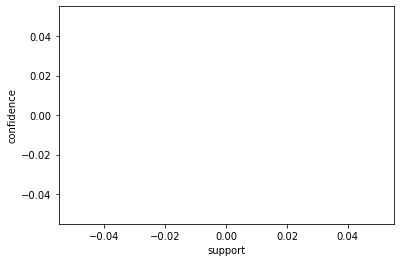

In [ ]:
su = rules['support'] 
co = rules['confidence'] 
plt.xlabel('support')
plt.ylabel('confidence')
plt.scatter(su,co)
plt.show()

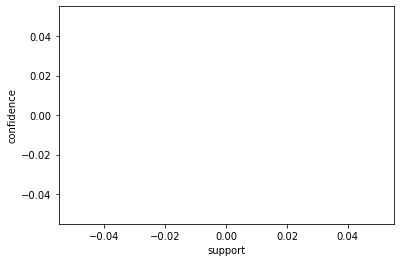

In [ ]:
su = rules['support'] 
li = rules['lift'] 
plt.xlabel('support')
plt.ylabel('confidence')
plt.scatter(su,li)
plt.show()